In [ ]:
#Code to run TICA docking for protein-ligand md on backbone positions

In [1]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

Populating the interactive namespace from numpy and matplotlib


In [2]:

trajfile = []
for i in range(1,6):
    path = '/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/joined_holo_md_'+str(i)+'.nc'
    trajfile.append(path)
print(trajfile)

#assigns the features, which in this case is backbone atom positions
feat = coor.featurizer('/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/holo_top.h5')
feat.add_selection([1024, 1027, 306, 1029, 1031, 1033, 2851, 1035, 1036, 1037, 1038, 1039, 1034, 1040, 1042, 1043, 1044, 1045, 1041, 2854, 1049, 2076, 311, 1060, 1061, 1062,
                              1072, 1074, 1076, 1087, 2112, 2116, 2120, 2122, 2123, 2126, 2135, 323, 2138, 324, 325, 1133, 1134, 1135, 1136, 1137, 2170, 330, 3206, 3207, 3208, 3210, 
                              334, 3219, 336, 2207, 2209, 2210, 2211, 2213, 2214, 2215, 2217, 2219, 2220, 2221, 3244, 1715, 1716, 1743, 1745, 1747, 1749, 2897, 2837, 328, 329, 2899, 339, 342, 343, 350, 2911, 354, 359, 361, 362, 363, 364, 365, 366, 367, 379, 385, 386, 395, 398, 2449, 
                              2451, 2452, 2453, 2454, 2455, 2456, 2460, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2477, 2478, 941, 2480, 2481, 946, 2834, 944, 2486, 
                              2487, 2488, 2835, 2492, 2836, 2494, 963, 2838, 2506, 2507, 2508, 2839, 2510, 972, 978, 979, 980, 2841, 2842, 2844, 997, 2845, 1003, 2846, 1008, 1007, 1010, 
                              1009, 2847, 1012, 1013, 1011, 1016, 1017, 1018, 1022])

#defining the trajs and features without loading into memory
inp = coor.source(trajfile, feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())



['/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/joined_holo_md_1.nc', '/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/joined_holo_md_2.nc', '/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/joined_holo_md_3.nc', '/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/joined_holo_md_4.nc', '/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/joined_holo_md_5.nc']


trajectory length =  100000
number of dimension =  483


In [3]:
lag = 1000
tica_obj = coor.tica(inp, lag = lag, var_cutoff = 0.95, kinetic_map = False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.

Y = tica_obj.get_output()

print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))
#print(-lag/np.log(tica_obj.eigenvalues[:5]))

#making clusters from kmeans
cl = coor.cluster_kmeans(data = Y,k = 10, max_iter = 5000)


Mean values:  [[-3.0264855e-04 -7.9973042e-04 -6.4575674e-05 ...  1.7413616e-01
   4.5763347e-02 -1.6646276e-01]
 [-3.3117055e-03  4.1060746e-04  3.7675351e-03 ...  2.4995728e-01
   1.7957240e-01  1.8201438e-01]
 [-5.7923794e-04  9.8031759e-04  7.1529150e-03 ...  2.2164425e-01
   1.9725004e-01 -3.0688226e-01]
 ...
 [ 1.1060238e-04 -1.0325909e-04  6.3471319e-03 ...  5.1928461e-01
  -5.7000226e-01 -2.9638961e-01]
 [ 1.6586542e-03 -1.6492754e-03  6.6738127e-04 ...  3.6799157e-01
  -5.4286158e-01 -3.1085199e-01]
 [-1.7900944e-03 -3.6242604e-05 -1.6127765e-03 ...  5.1228571e-01
  -4.8371977e-01 -5.3778476e-01]]
Variances:    [[0.9992136  0.99845016 0.98911464 ... 0.37602696 0.49817282 0.83815384]
 [1.0033958  1.007195   0.99786884 ... 0.44013    0.59691924 0.8188962 ]
 [1.0030495  0.99946105 1.0031097  ... 2.6329036  0.4548014  0.7174884 ]
 ...
 [0.99806595 1.0048827  0.9970268  ... 1.0927258  0.91099375 0.18105206]
 [0.99613684 1.0011774  1.004706   ... 0.7640165  1.5786763  0.52111256]
 [

In [4]:
# for later use we save the discretetrajectories (dtrajs) and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
print(dtrajs)
print(np.size(dtrajs))


[array([7, 7, 7, ..., 9, 9, 9], dtype=int32), array([6, 6, 6, ..., 3, 3, 3], dtype=int32), array([2, 2, 2, ..., 2, 2, 2], dtype=int32), array([4, 4, 4, ..., 8, 8, 8], dtype=int32), array([1, 5, 5, ..., 0, 0, 0], dtype=int32)]
500000


In [5]:
cl.converged

True

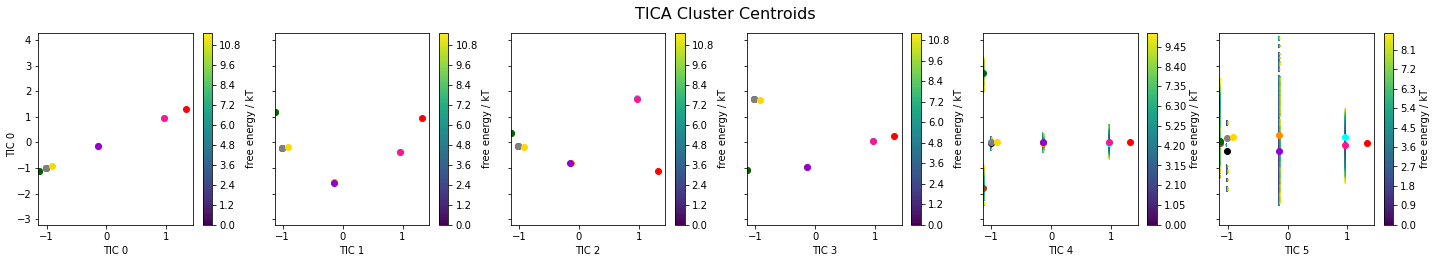

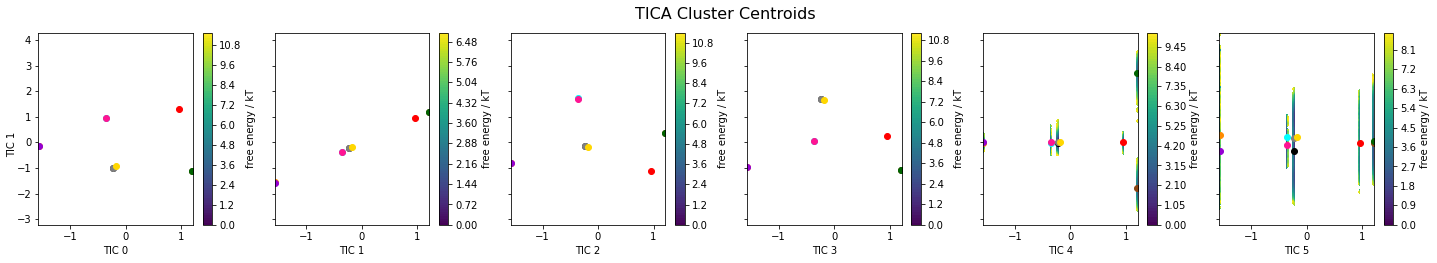

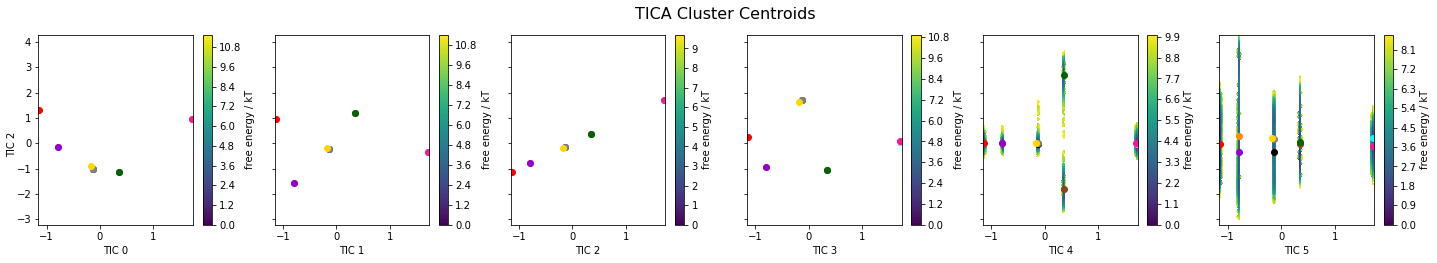

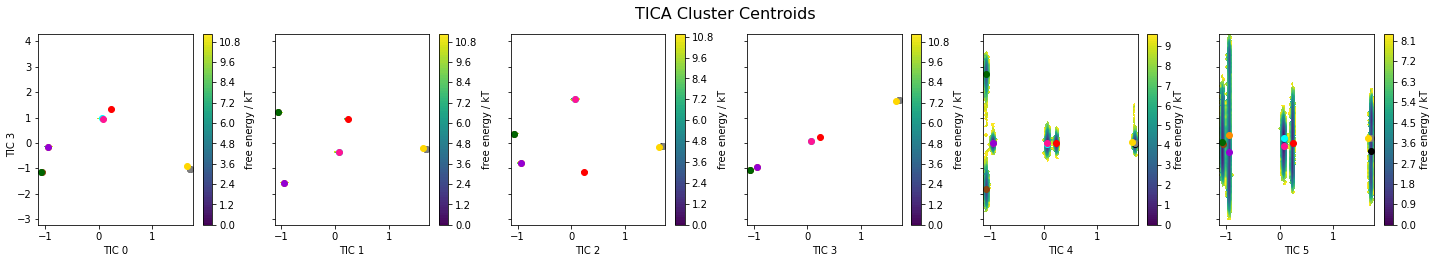

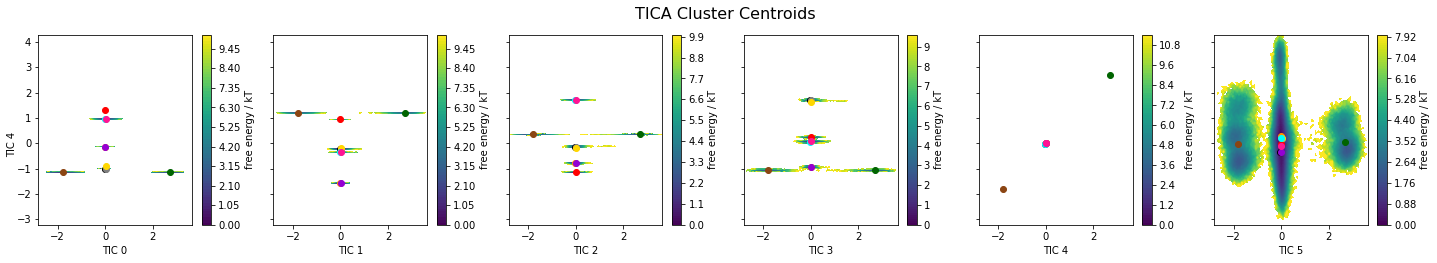

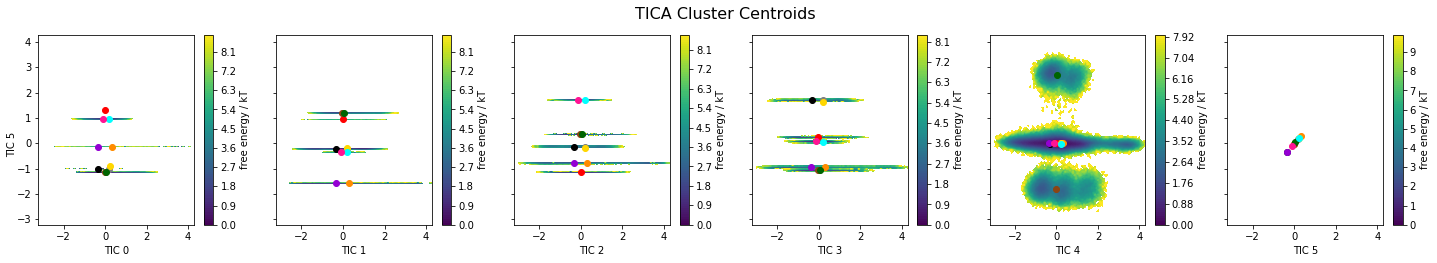

In [6]:
#plotting the free energy in subplots for tics 0-5

for s in range(6):
    fig, ax = plt.subplots(1, 6, sharex='col', sharey='row', figsize = (20,3.4)) #creating 1x6 subplot grid
    
    for w in range(6):
        mplt.plot_free_energy(np.vstack(Y)[:,s], np.vstack(Y)[:,w], ax = ax[w], cmap = 'viridis')#, cbar = False, cbar_label = None)
        cc_x = cl.clustercenters[:,s]
        cc_y = cl.clustercenters[:,w]
        #ax[w].plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='red')
        colors = ['black','gray','red','saddlebrown','darkorange','gold','darkgreen','aqua','darkviolet','deeppink']
        for i in range(10):
            ax[w].scatter(cc_x[i], cc_y[i], color = colors[i])
    
    for a in range(6):
        ax[a].set(xlabel = ('TIC '+str(a)))
        
    fig.text(0.001, 0.5, 'TIC '+str(s), va = 'center', rotation='vertical')
    
    fig.suptitle('TICA Cluster Centroids',fontsize = 16, y=1.06)
    fig.tight_layout()

    plt.savefig('/home/jegan/Clustering_methods/TICA/figs/CBA_holo/TICA_FE_TIC'+str(s)+'.png', bbox_inches = 'tight')


In [7]:
#This tells us how much each feature contributes to each TIC
tica_obj.feature_TIC_correlation

array([[ 1.40464249e-01,  9.10537960e-01, -3.86467570e-01, ...,
         1.78356168e-05, -5.42141525e-04, -2.79237953e-04],
       [ 3.49734217e-01,  7.86925948e-01,  4.24880861e-01, ...,
         1.22153950e-03, -2.50061105e-03, -1.76706903e-03],
       [ 9.92012505e-01, -5.81115302e-02,  7.87915722e-02, ...,
        -1.06409482e-03,  1.32722129e-04, -2.38592381e-04],
       ...,
       [ 1.46803901e-01,  9.26682545e-01, -3.41450583e-01, ...,
         8.61684074e-05, -6.04209675e-04,  1.16220685e-04],
       [ 2.47448189e-01,  8.31643717e-01,  4.53231828e-01, ...,
        -6.09835777e-05, -2.55852758e-03, -1.73500879e-03],
       [ 9.94442904e-01, -6.93712463e-02,  5.44177618e-02, ...,
        -1.02900204e-03, -1.95402292e-04, -2.19779475e-04]])

In [8]:
#This tells us the number of TICs TICA produces to retain the variance we want, which is .95
tica_obj.cumvar

array([0.10343755, 0.20687417, 0.31029968, 0.41369036, 0.49417265,
       0.55028037, 0.60161969, 0.6508594 , 0.6952733 , 0.72673728,
       0.75685717, 0.78524744, 0.81129104, 0.83180229, 0.84831537,
       0.86112025, 0.87222141, 0.88143022, 0.88971484, 0.89723837,
       0.90339044, 0.9087036 , 0.91345285, 0.91791604, 0.92180337,
       0.92547771, 0.92863616, 0.93128679, 0.93365315, 0.93591216,
       0.93793708, 0.93986311, 0.94171215, 0.94346232, 0.94515229,
       0.94679077, 0.94829083, 0.94977901, 0.95115905, 0.95243649,
       0.9537015 , 0.95480561, 0.95588603, 0.95694523, 0.95793666,
       0.95889211, 0.95981209, 0.96070068, 0.96150259, 0.9622775 ,
       0.96304641, 0.96376776, 0.96447284, 0.96514176, 0.96575014,
       0.96634986, 0.96693613, 0.96750128, 0.96806625, 0.96861477,
       0.96914689, 0.9696665 , 0.97015434, 0.97062266, 0.97107628,
       0.97152284, 0.97195443, 0.97238072, 0.97278763, 0.97318592,
       0.97357459, 0.97395512, 0.9743119 , 0.97466363, 0.97500

In [9]:
#This prints the discrete trajectories we saved out before, then saves out the percent of frames in each cluster
print(dtrajs)
print(dtrajs[0])

with open('/home/jegan/Clustering_methods/TICA/clusters_CBA_holo.txt', 'w') as newfile:
    numb = []
    for i in range(10):
        frames = []
        for k in dtrajs:
            for p in k:
                if p == i:
                    frames.append(p)

        print(len(frames))
        numb.append(len(frames))
    
    newfile.write('Percent of frames per TICA CBA holo cluster:\n')
    tot = 0
    index = 0
    for j in numb:
        tot += j
        percent = (j/450000)*100
        num = str(percent)
        newfile.write('Cluster '+ str(index)+' = '+num+' %\n')
        index += 1
    print(tot)


[array([7, 7, 7, ..., 9, 9, 9], dtype=int32), array([6, 6, 6, ..., 3, 3, 3], dtype=int32), array([2, 2, 2, ..., 2, 2, 2], dtype=int32), array([4, 4, 4, ..., 8, 8, 8], dtype=int32), array([1, 5, 5, ..., 0, 0, 0], dtype=int32)]
[7 7 7 ... 9 9 9]
37936
41866
99121
60010
52977
21077
39990
36698
47023
63302
500000


In [11]:
#Extracting Centroids

avg = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

indices = {}
for i in range(len(Y)):
    #for k in range(len(Y[0][i])):
    for k in range(len(Y[i])):
        c = cl.clustercenters[cl.dtrajs[i][k]]
        v = Y[i][k]
        newavg = np.linalg.norm(c-v)
        if avg[cl.dtrajs[i][k]] > newavg:
            avg[cl.dtrajs[i][k]] = newavg
            indices[cl.dtrajs[i][k]] = [i, k]

pdb0 = md.load('/home/jegan/final_centroids/XTAL/XTAL_0.pdb')

z = 0
for key in indices:
        z = z + 1
        index = indices[key][1]*(1 + indices[key][0])
        print(index)
        cen = md.load_frame('/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/entire_holo_md.nc', index, top = '/net/jam-amaro-shared/bccgc4/CatS_holo_md/joined_md/holo_top.h5')
        pdb = cen.superpose(pdb0,0)
        
        pdb.save_pdb('/home/jegan/Clustering_methods/TICA/TICA_CBA_holo_centroids/TICA_%s.pdb' % (z-1))
        

99143
51588
49378
185516
149076
200735
44332
167008
431640
97735


In [12]:
#saving out the first frame as the xtal

trajectory = md.load('/net/jam-amaro-shared/bccgc4/CatS_lig_md/md/joined_prot_traj.nc',
                     top = '/net/jam-amaro-shared/bccgc4/CatS_lig_md/md/joined_prot_top.h5')
pdb0 = md.load('/home/jegan/final_centroids/XTAL/XTAL_0.pdb')

i = trajectory[0].topology.select('protein')
new = trajectory[0].atom_slice(i)
select = new.topology.select('resid 0 to 86')

pdb = new.superpose(pdb0,0,select)
        
pdb.save_pdb('/home/jegan/final_centroids/prot-lig/XTAL.pdb')
        